# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle

# Read the Dataset

In [3]:
data=pd.read_csv("Data/autos.csv",header=0,sep=',',encoding='Latin1',)

In [4]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
data.shape

(371528, 20)

# Checking null values

In [7]:
data.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

# Checking the Unique values

In [8]:
data.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

# Cleaning The Dataset

In [9]:
print(data.seller.value_counts())

privat        371525
gewerblich         3
Name: seller, dtype: int64


In [10]:
data[data.seller !='gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [11]:
data=data.drop('seller',1)

/var/folders/hf/2qd6lpqs4r7_19kpypql9pyw0000gq/T/ipykernel_18905/3831226476.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('seller',1)


In [12]:
print(data.offerType.value_counts())

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64


In [13]:
data[data.offerType !='Gesuch']

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [14]:
data=data.drop('offerType',1)

/var/folders/hf/2qd6lpqs4r7_19kpypql9pyw0000gq/T/ipykernel_18905/2361284133.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data=data.drop('offerType',1)


In [15]:
print(data.shape)

(371528, 18)


In [16]:
data=data[(data.powerPS>50)&(data.powerPS<900)]

In [17]:
print(data.shape)

(319709, 18)


In [18]:
data=data[(data.yearOfRegistration>=1950)&(data.yearOfRegistration<2017)]

In [19]:
print(data.shape)

(309171, 18)


In [20]:
data.drop(['name','abtest','dateCrawled','nrOfPictures','lastSeen','postalCode','dateCreated',],axis='columns',inplace=True)

In [21]:
new_dataset=data.copy()

In [22]:
new_dataset=new_dataset.drop_duplicates(['price','vehicleType','yearOfRegistration','gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType','notRepairedDamage'])

In [23]:
new_dataset.count()

price                  285145
vehicleType            274091
yearOfRegistration     285145
gearbox                280031
powerPS                285145
model                  273813
kilometer              285145
monthOfRegistration    285145
fuelType               269665
brand                  285145
notRepairedDamage      243965
dtype: int64

In [24]:
new_dataset.gearbox.replace(('manuell','automatik'),('manual','automatic'),inplace=True)
new_dataset.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
new_dataset.vehicleType.replace(('kleinwagen','cabrio','kombi','andere'),('small car','convertible','combination','others'),inplace=True)
new_dataset.notRepairedDamage.replace(('ja','nein'),('Yes','No'),inplace=True)

In [25]:
new_dataset=new_dataset[(new_dataset.price >= 100)&(new_dataset.price <=150000)]

In [26]:
new_dataset['notRepairedDamage'].fillna(value='not-declared',inplace=True)
new_dataset['fuelType'].fillna(value='not-declared',inplace=True)
new_dataset['gearbox'].fillna(value='not-declared',inplace=True)
new_dataset['vehicleType'].fillna(value='not-declared',inplace=True)
new_dataset['model'].fillna(value='not-declared',inplace=True)

In [27]:
new_dataset.isna().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [28]:
new_dataset.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300,coupe,2011,manual,190,not-declared,125000,5,diesel,audi,Yes
2,9800,suv,2004,automatic,163,grand,125000,8,diesel,jeep,not-declared
3,1500,small car,2001,manual,75,golf,150000,6,petrol,volkswagen,No
4,3600,small car,2008,manual,69,fabia,90000,7,diesel,skoda,No
5,650,limousine,1995,manual,102,3er,150000,10,petrol,bmw,Yes


In [29]:
new_dataset.tail()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
371520,3200,limousine,2004,manual,225,leon,150000,5,petrol,seat,Yes
371524,1199,convertible,2000,automatic,101,fortwo,125000,3,petrol,smart,No
371525,9200,bus,1996,manual,102,transporter,150000,3,diesel,volkswagen,No
371526,3400,combination,2002,manual,100,golf,150000,6,diesel,volkswagen,not-declared
371527,28990,limousine,2013,manual,320,m_reihe,50000,8,petrol,bmw,No


# Visualization

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'audi'),
  Text(1, 0, 'jeep'),
  Text(2, 0, 'volkswagen'),
  Text(3, 0, 'skoda'),
  Text(4, 0, 'bmw'),
  Text(5, 0, 'peugeot'),
  Text(6, 0, 'ford'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'nissan'),
  Text(9, 0, 'renault'),
  Text(10, 0, 'mercedes_benz'),
  Text(11, 0, 'honda'),
  Text(12, 0, 'fiat'),
  Text(13, 0, 'opel'),
  Text(14, 0, 'mini'),
  Text(15, 0, 'smart'),
  Text(16, 0, 'hyundai'),
  Text(17, 0, 'alfa_romeo'),
  Text(18, 0, 'subaru'),
  Text(19, 0, 'volvo'),
  Text(20, 0, 'mitsubishi'),
  Text(21, 0, 'kia'),
  Text(22, 0, 'seat'),
  Text(23, 0, 'lancia'),
  Text(24, 0, 'porsche'),
  Text(25, 0, 'citroen'),
  Text(26, 0, 'toyota'),
  Text(27, 0, 'chevrolet'),
  Text(28, 0, 'dacia'),
  Text(29, 0, 'suzuki'),
  Text(30, 0, 'daihatsu'),
  Text(31, 0, 'chrysler'),
  Text(32, 0, 'sons

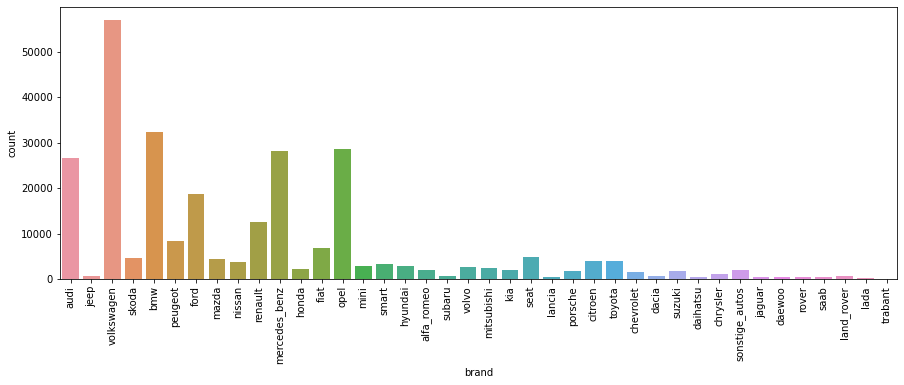

In [31]:
plt.figure(figsize = (15, 5))
sns.countplot(x=new_dataset['brand'])
plt.xticks(rotation=90)

limousine     88521
kleinwagen    63898
kombi         62640
bus           27706
cabrio        21249
coupe         17538
suv           13674
andere         2523
Name: vehicleType, dtype: int64


/Users/rosemarychittilappilly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicleType', ylabel='count'>

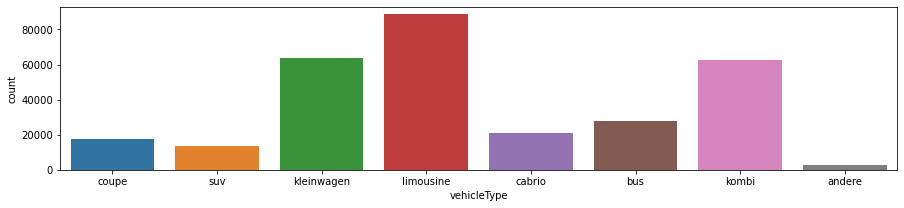

In [32]:
print(data.vehicleType.value_counts())
plt.figure(figsize = (15, 3))
sns.countplot(data['vehicleType'])

/Users/rosemarychittilappilly/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='count'>

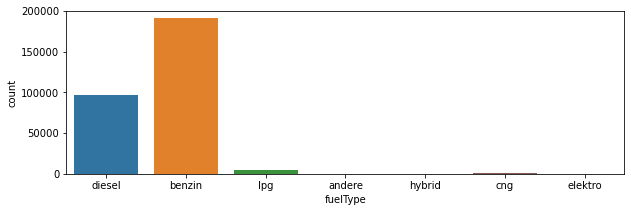

In [33]:
plt.figure(figsize = (10, 3))
sns.countplot(data['fuelType'])

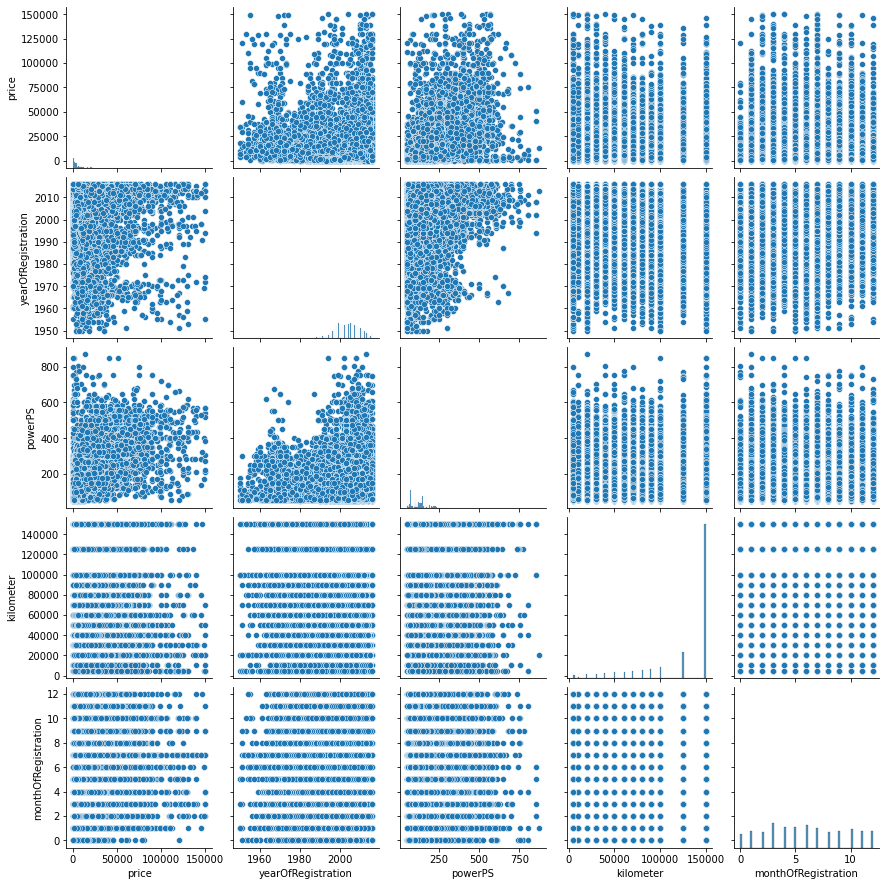

In [34]:
sns.pairplot(new_dataset)

In [35]:
new_dataset.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,0.389244,0.581269,-0.446352,0.042642
yearOfRegistration,0.389244,1.000000,0.152223,-0.370298,0.041436
powerPS,0.581269,0.152223,1.000000,-0.027243,0.034140
kilometer,-0.446352,-0.370298,-0.027243,1.000000,-0.017340
monthOfRegistration,0.042642,0.041436,0.034140,-0.017340,1.000000


<AxesSubplot:>

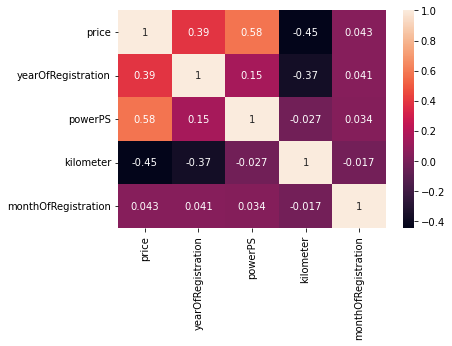

In [36]:
sns.heatmap(new_dataset.corr(),annot=True)

# Saving the cleaned dataset

In [37]:
new_dataset.to_csv("autos_preprocessed.csv")

# Label encoding the categorical data

In [38]:
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

mapper = {}
for i in labels:
    mapper[i] = LabelEncoder()
    mapper[i].fit(new_dataset[i])
    tr = mapper[i].transform(new_dataset[i])
    np.save(str('classes'+i+'.npy'), mapper[i].classes_)
    new_dataset.loc[:, i+'_labels'] = pd.Series(tr, index=new_dataset.index)
    
labeled = new_dataset[['price', 'yearOfRegistration','powerPS','kilometer','monthOfRegistration']
                  +[x+"_labels" for x in labels]]

print(labeled.columns)

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


In [39]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278578 entries, 1 to 371527
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   price                     278578 non-null  int64 
 1   vehicleType               278578 non-null  object
 2   yearOfRegistration        278578 non-null  int64 
 3   gearbox                   278578 non-null  object
 4   powerPS                   278578 non-null  int64 
 5   model                     278578 non-null  object
 6   kilometer                 278578 non-null  int64 
 7   monthOfRegistration       278578 non-null  int64 
 8   fuelType                  278578 non-null  object
 9   brand                     278578 non-null  object
 10  notRepairedDamage         278578 non-null  object
 11  gearbox_labels            278578 non-null  int64 
 12  notRepairedDamage_labels  278578 non-null  int64 
 13  model_labels              278578 non-null  int64 
 14  bran

# Splitting Data Into Independent And Dependent Variables

In [40]:
Y = labeled.iloc[:,0].values

In [41]:
X= labeled.iloc[:,1:].values

In [42]:
Y=Y.reshape(-1,1)

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.15477685,  0.98363346, -0.00840187, ..., -1.42763225,
        -1.43892059, -0.27453985],
       [ 0.09592185,  0.54636171, -0.00840187, ..., -0.45869425,
        -1.43892059,  1.74235787],
       [-0.35787314, -0.87882029,  0.62686435, ...,  1.33011436,
         0.74532082,  1.33897833],
       ...,
       [-1.11419814, -0.44154854,  0.62686435, ...,  1.33011436,
        -1.43892059, -1.48467848],
       [-0.20660814, -0.47393904,  0.62686435, ...,  1.33011436,
        -1.43892059, -1.08129894],
       [ 1.45730685,  3.08901596, -1.9142005 , ..., -1.35309856,
         0.74532082,  0.1288397 ]])

In [45]:
from sklearn.preprocessing import scale
Y=scale(Y)
Y

array([[ 1.42198263],
       [ 0.40444993],
       [-0.58914082],
       ...,
       [ 0.3326241 ],
       [-0.36169233],
       [ 2.70167964]])

In [48]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state = 3)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (195004, 10)
Number transactions y_train dataset:  (195004, 1)
Number transactions X_test dataset:  (83574, 10)
Number transactions y_test dataset:  (83574, 1)


In [49]:
X_train

array([[-0.20660814, -0.21481504,  0.62686435, ..., -0.75682902,
        -1.43892059, -1.08129894],
       [-0.66040314,  1.03221921,  0.62686435, ..., -0.0114921 ,
         0.74532082, -0.67791939],
       [ 1.15477685, -0.39296279, -1.9142005 , ...,  1.33011436,
        -1.43892059,  0.1288397 ],
       ...,
       [-1.41672814, -0.44154854,  0.62686435, ..., -1.35309856,
         0.74532082,  0.1288397 ],
       [-1.26546314, -1.12174904,  0.62686435, ...,  0.28664267,
         0.74532082,  1.33897833],
       [ 1.30604185,  2.97564921, -1.9142005 , ..., -1.42763225,
        -1.43892059, -1.08129894]])

In [50]:
Y_train

array([[-0.58914082],
       [-0.08635996],
       [ 0.78752107],
       ...,
       [-0.67293763],
       [-0.67293763],
       [ 5.21678105]])

In [51]:
X_test

array([[ 0.70098185,  0.17387096,  0.62686435, ..., -1.42763225,
        -1.43892059,  0.1288397 ],
       [-0.50913814, -1.12174904,  0.62686435, ...,  1.33011436,
         0.74532082,  1.33897833],
       [ 0.09592185, -1.21892054, -0.00840187, ...,  1.33011436,
         0.74532082,  1.33897833],
       ...,
       [-0.35787314, -0.44154854,  0.62686435, ..., -0.0114921 ,
         0.74532082,  0.1288397 ],
       [-0.05534314,  0.27104246,  0.62686435, ..., -1.35309856,
         0.74532082, -0.67791939],
       [-0.66040314, -0.87882029,  0.62686435, ...,  0.28664267,
         0.74532082,  1.33897833]])

In [52]:
Y_test

array([[ 0.42839188],
       [-0.58914082],
       [-0.44560885],
       ...,
       [-0.61308276],
       [-0.17015677],
       [-0.67569095]])